In [35]:
import numpy as np
import pandas as pd

# KNN example

In [36]:
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [37]:
data = pd.read_csv('datasets/car.data')
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [38]:
X = data[['buying', 'maint', 'safety']].values
y = data[['class']]

### Converting

In [39]:
Le = LabelEncoder()
for i in range(len(X[0])):
    X[:, i] = Le.fit_transform(X[:, i])

In [40]:
y['class'] = y['class'].map({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})
y = np.array(y)

C:\Users\sasha\AppData\Local\Temp\ipykernel_19280\3803032324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train

array([[1, 2, 2],
       [0, 2, 1],
       [3, 1, 1],
       ...,
       [1, 2, 0],
       [2, 2, 1],
       [3, 0, 1]], dtype=object)

### Create model

In [42]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')
knn.fit(X_train, y_train)

E:\AnacondaNew\envs\ObjectDetectionGPU\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=25)

In [43]:
predictions = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)

In [44]:
accuracy

0.7583187390542907

# SVM

In [45]:
from sklearn import datasets
from sklearn import svm

In [46]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [47]:
classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [48]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [49]:
predictions = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predictions)

In [50]:
acc

0.9

# Linear Regression

In [51]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [52]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

X = housing.data
y = housing.target
X.shape

(20640, 8)

### Algorithm

In [53]:
l_reg = linear_model.LinearRegression()

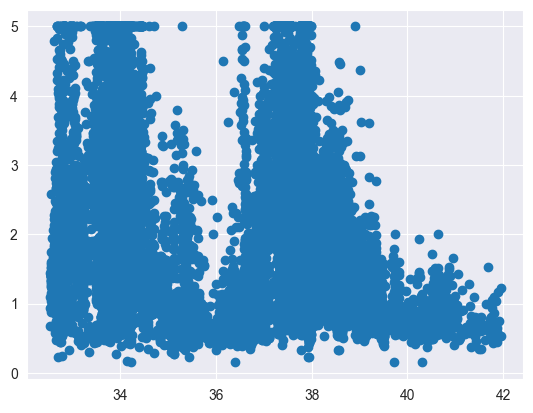

In [54]:
plt.scatter(X.T[6], y)
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [56]:
model = l_reg.fit(X_train, y_train)
predictions = model.predict(X_test)

### R^2 value, coeff

In [57]:
l_reg.score(X_test, y_test)

0.6100123400811845

In [58]:
l_reg.coef_

array([ 4.31659692e-01,  9.53892645e-03, -1.10804764e-01,  7.67738124e-01,
       -4.62941103e-06, -3.20858407e-03, -4.42113724e-01, -4.53811109e-01])

# KMeans

In [59]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [60]:
bc = load_breast_cancer()
X = scale(bc.data)
y = bc.target

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [62]:
model = KMeans(n_clusters=2, random_state=0)

In [63]:
model.fit(X_train)

E:\AnacondaNew\envs\ObjectDetectionGPU\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [64]:
predictions = model.predict(X_test)
model.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,